### Chapter 3: Getting Started with Neural Netwrk  
### Binary Classification

In [1]:
from myutils import *

In [2]:
# import
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras.datasets import imdb

Using Theano backend.


### Reading imdb data

In [3]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
type(train_data)

numpy.ndarray

In [5]:
# total samples
len(train_data)

25000

In [6]:
# total columns
train_data.shape

(25000,)

In [7]:
train_data.ndim

1

In [8]:
# max seq
max(max(seq) for seq in train_data)

9999

In [9]:
word_index = imdb.get_word_index()

In [10]:
word_index['unknown']

1856

In [11]:
reverse_word_index = reverse_dict(word_index)

In [12]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [13]:
decoded_review

"? have you ever wondered what would happen if a couple of characters from beverly hills ? were thrown into a ? jail if so this is your movie this is midnight express for the mtv crowd that would be ok but the story was poorly executed contrived plot twists poor dialogue and ? issues abound this slight film did not earn the right to be as ? as it ends up being potential spoiler and ? preposterous plot line the faux tension filled moment when the hotel employee discovers the girls do not have a room there and is about to kick them out this moment is ? played with the same ? and gravity as the moment when they are arrested at ? later the same hotel employee is somehow found and ? is a big city mind you ? been there and ? against the girls as if a couple of free ? ? warrant 40 years in prison c'mon rent another day in paradise instead"

In [14]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
decoded_review

"? i too loved this series when i was a kid in ? i was 5 and my family always watched this show my favorite character was the one played by marion ? as a rather ? bumbling and very lovable aunt type person i can still recall her ? ? um um type comments as she would try and say something important and then when she came back and played aunt clara in ? it was great casting br br it was the first time that i can remember seeing walter matthau whose career i followed as a fan for many many years br br i have a question if anyone can ? was the title or end credits music the swedish ? by hugo ? every time i hear it played on my classical radio station here in southern california it brings back memories of the image of mr ? walking away with his back to the camera i'm not even certain if this image in my ? eye is correct"

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [21]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.6699 - acc: 0.6387 - val_loss: 0.6400 - val_acc: 0.7388
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.6014 - acc: 0.7964 - val_loss: 0.5725 - val_acc: 0.8111
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.5314 - acc: 0.8430 - val_loss: 0.5134 - val_acc: 0.8389
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.4708 - acc: 0.8655 - val_loss: 0.4637 - val_acc: 0.8525
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.4204 - acc: 0.8826 - val_loss: 0.4243 - val_acc: 0.8635
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.3786 - acc: 0.8926 - val_loss: 0.3924 - val_acc: 0.8690
Epoch 7/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.3441 - acc: 0.9011 - val_loss: 0.3663 - 

In [23]:
history_dict = history.history

In [24]:
print(history_dict.keys())
print(history_dict)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
{'val_loss': [0.6399702818870544, 0.57246840677261357, 0.51339922237396241, 0.46366495933532714, 0.42425622630119325, 0.39235575790405275, 0.36631035490036012, 0.34556996626853942, 0.32966884269714353, 0.3148717339038849, 0.30382934856414795, 0.29479613981246949, 0.28754119138717649, 0.28326381273269652, 0.27779396100044251, 0.2750038453578949, 0.27119108901023864, 0.26931232376098635, 0.26814435353279115, 0.26768408241271974], 'val_acc': [0.73880000038146976, 0.81109999942779543, 0.8389000004768371, 0.85249999933242793, 0.86349999971389768, 0.86900000019073487, 0.87570000028610229, 0.88070000019073491, 0.88109999980926512, 0.88499999990463252, 0.88670000009536742, 0.88980000009536742, 0.8872999999046326, 0.89190000000000003, 0.89110000009536738, 0.89240000009536746, 0.89189999990463253, 0.89279999990463255, 0.89329999980926511, 0.89399999971389765], 'loss': [0.66986193688710527, 0.60136682392756147, 0.53136296027501428, 0.4708016910552

In [25]:
import matplotlib.pyplot as plt

In [26]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [27]:
epochs = range(1, len(history_dict['acc']) + 1)

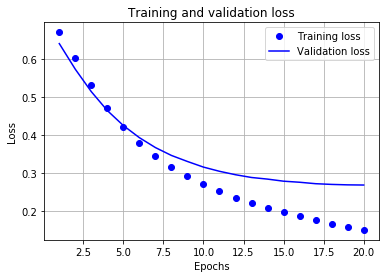

In [28]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

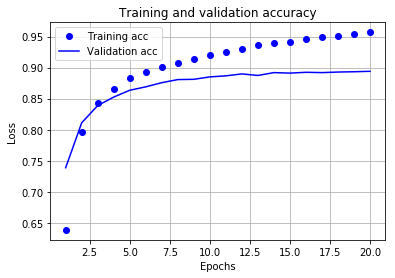

In [29]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Building another neural net with less no of input

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=['accuracy'])

In [32]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.6809 - acc: 0.6048 - val_loss: 0.6653 - val_acc: 0.6780
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.6414 - acc: 0.7357 - val_loss: 0.6261 - val_acc: 0.7643
Epoch 3/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.5993 - acc: 0.8020 - val_loss: 0.5893 - val_acc: 0.7965
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.5599 - acc: 0.8350 - val_loss: 0.5542 - val_acc: 0.8267
Epoch 5/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.5231 - acc: 0.8563 - val_loss: 0.5223 - val_acc: 0.8408
Epoch 6/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.4894 - acc: 0.8695 - val_loss: 0.4935 - val_acc: 0.8528
Epoch 7/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.4587 - acc: 0.8783 - val_loss: 0.4682 - 

In [33]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 87us/step


In [34]:
results

[0.31988210227966307, 0.87868000000000002]

In [35]:
y_pred = model.predict(x_test)

NameError: name 'r' is not defined